In [266]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import cKDTree
from itertools import combinations
from metrics import *
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import time
import random

  Juan Manuel Jimenez  
  Ian Chona  
  Camilo Franco  

indices originales, cada 1 es un cluster [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199]
[[         nan          nan          nan ...          nan          nan
           nan]
 [ 42.                  nan          nan ...          nan  

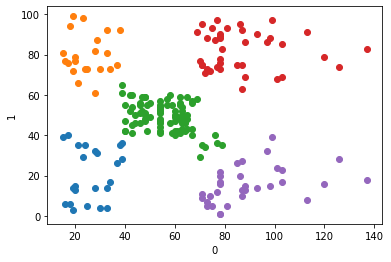

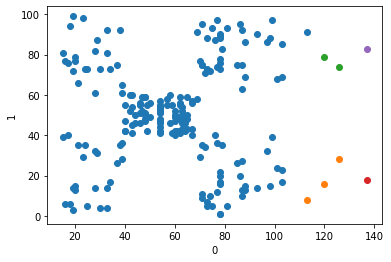

In [226]:
#punto 1.2
#con la matriz de distancia notamos una diferencia abismal,ya que tenemos 
#una tabla referencia para manipular las distancias
D=pd.read_csv('Mall_Customers.csv').values[:,[3,4]]
def deltaSingle(i,j,r,Delta):
    dist=np.array([Delta[r,[i,j]],Delta[[i,j],r]])    
    mindist=np.amin(dist,where=~np.isnan(dist), initial=np.inf)    
    index=min(i,j)
    if(np.isnan(Delta[r,index])):
        Delta[index,r]=mindist
    else:
        Delta[r,index]=mindist    
    return Delta
def deltaComplete(i,j,r,Delta):
    dist=np.array([Delta[r,[i,j]],Delta[[i,j],r]]) 
    maxdist=np.amax(dist,where=~np.isnan(dist), initial=-np.inf)   
    index=min(i,j)
    if(np.isnan(Delta[r,index])):
        Delta[index,r]=maxdist  
    else:                        
        Delta[r,index]=maxdist    
    return Delta

def AgglomerativeClustering(D,dist,k=1):
    Delta=np.zeros([D.shape[0],D.shape[0]])
    Delta[:] = np.nan 
    C1=np.arange(D.shape[0]) 
    print("indices originales, cada 1 es un cluster",N)
    for combo in combinations(np.arange(D.shape[0]),2):
        Delta[combo[1],combo[0]]=np.linalg.norm(D[combo[0]]-D[combo[1]]) 
    #llenamos la matriz de distancia original
    print(Delta)
    
    while True:
        i,j=np.unravel_index(np.nanargmin(Delta, axis=None), Delta.shape)
        
        for r in range(Delta.shape[0]):
            if not(r==i or r==j):
                Delta=dist(i,j,r,Delta)
        
        uniqueC1=np.unique(C1)  
        C1 = np.where(C1 == uniqueC1[i], uniqueC1[j], C1)
        Delta=np.delete(Delta, i, 0) 
        Delta=np.delete(Delta, i, 1)
        
        if Delta.shape[0]==k:
            break;           
    print("indices finales",C1)
    return C1



In [201]:
#punto 1.3
def singleLinkW(i,j,r,Delta,N):
    
    d=LanceWilliams(i,j,r,Delta,1/2,1/2,0,-1/2)
        
    return d
    
def completeLinkW(i,j,r,Delta,N):
    d=LanceWilliams(i,j,r,Delta,1/2,1/2,0,1/2)
        
    return d
def averagePairW(i,j,r,Delta,N):
    ni=N[i]
    nj=N[j]
    d=LanceWilliams(i,j,r,Delta,ni/(ni+nj),nj/(ni+nj),0,0)
       
    return d
def centroidDistW(i,j,r,Delta,N):
    ni=N[i]
    nj=N[j]
    d=LanceWilliams(i,j,r,Delta,ni/(ni+nj),nj/(ni+nj),(-ni*nj)/(ni+nj)**2,0)
       
    return d
def wardClusterW(i,j,r,Delta,N):
    ni=N[i]
    nj=N[j]
    nr=N[r]
    d=LanceWilliams(i,j,r,Delta,ni+nr/(ni+nj+nr),nj+nr/(ni+nj+nr),-nr/(ni+nj+nr),0)
        
    return d

def LanceWilliams(i,j,r,Delta,alphai,alphaj,beta,gamma):
   
    if(r>i):
        deltaCiCr=Delta[r,i]
    else:
        deltaCiCr=Delta[i,r]
    
    if(r>j):
        deltaCjCr=Delta[r,j]
    else:
        deltaCjCr=Delta[j,r] 
    
    if(j>i):
        deltaCiCj=Delta[j,i]
    else:
        deltaCiCj=Delta[i,j]
        
    deltaCijCr=(alphai*deltaCiCr) +(alphaj*deltaCjCr)+(beta*deltaCiCj)+(gamma*(abs(deltaCiCr-deltaCjCr)))
    return deltaCijCr

tiempo:  112.5115532875061


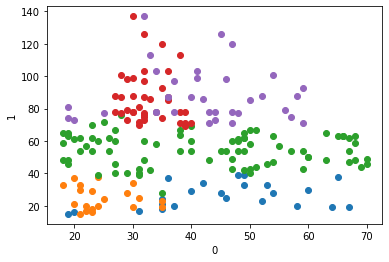

In [260]:
#punto 1.1
def deltaSingleNaive(Ci,Cj):
    minDist=np.inf
    for xi in Ci:
        for yj in Cj:
            distance=np.linalg.norm(xi-yj)            
            if distance <= minDist:
                minDist=distance                          
                    
    return minDist

def deltaCompleteNaive(Ci,Cj):
    minDist=0
    for xi in Ci:
        for yj in Cj:          
           
            distance=np.linalg.norm(xi-yj)            
            if distance >= minDist:
                minDist=distance
                           
                    
    return minDist

def agglomerativeClusteringNaive(D,dist,k=1):
    C1=np.arange(D.shape[0])    
    uniqueC1=np.unique(C1) 
    while uniqueC1.shape[0]>k:
        
               
        minDis=np.inf        
        
        for combo in combinations(uniqueC1,2):            
            Ct1=D[np.where(C1==combo[0])] 
            Ct2=D[np.where(C1==combo[1])]                           
            interClusterDis=dist(Ct1,Ct2)            
            if interClusterDis<=minDis:                
                minDis=interClusterDis
                clusterIndx=[combo[0],combo[1]]
                
        C1 = np.where(C1== clusterIndx[1], clusterIndx[0], C1)
        uniqueC1=np.unique(C1) 
                   
    C1=np.unique(C1, return_inverse = True)[1]+1     
    return C1
D=pd.read_csv('Mall_Customers.csv').values[:,[2,3,4]]
#C2=agglomerativeClusteringNaive(D,deltaSingleNaive,5)
#plotClusters(D, C2, 0, 1, None, None)
start = time.time()
C1=agglomerativeClusteringNaive(D,deltaCompleteNaive,5)
end = time.time()
print("tiempo: ",end-start)
plotClusters(D, C1, 0, 1, None, None)
#este algoritmo sin la matriz de distancia toma bastante tiempo
#ya que tiene que hacer
#nC2 + (n-1)C2+....(k)C2 iteraciones
#La opcion por la que optamos fue usar la libreria de spicy , import hierarchy
#solo para este punto en particular por que trabajar con riddle.xls
#demora muchisimo tiempo




distancias entre cluster finales: 
            0           1           2           3   4
0         NaN         NaN         NaN         NaN NaN
1  101.158292         NaN         NaN         NaN NaN
2   84.463010   87.435691         NaN         NaN NaN
3  146.560568  122.347865  111.310377         NaN NaN
4  124.474897  143.157256  117.213480  103.232747 NaN

cantidad de puntos en cada cluster:  [23 20 83 39 35]
tiempo de Complete link 0.7950773239135742


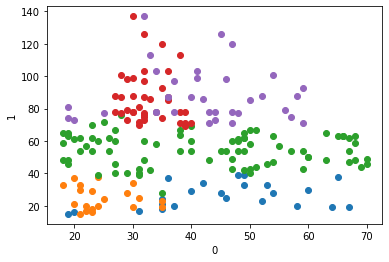

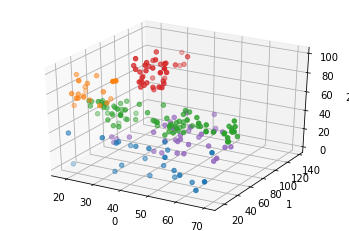

In [238]:
D=pd.read_csv('Mall_Customers.csv')
del D['CustomerID']
del D['Gender']
D=D.values
def AgglomerativeClusteringW(D,dist,k=1):
    Delta=np.zeros([D.shape[0],D.shape[0]])
    Delta[:] = np.nan 
    C1=np.arange(D.shape[0])
    N=np.ones(D.shape[0])
    
    for combo in combinations(np.arange(D.shape[0]),2):
        Delta[combo[1],combo[0]]=np.linalg.norm(D[combo[0]]-D[combo[1]])   
    
    while True:
        
        i,j=np.unravel_index(np.nanargmin(Delta, axis=None), Delta.shape)
        
        for r in range(Delta.shape[0]):
            if not(r==i or r==j):
                d=dist(i,j,r,Delta,N)
                index=min(i,j)
                if(np.isnan(Delta[r,index])):
                    Delta[index,r]=d  
                else:                        
                    Delta[r,index]=d                
        
        uniqueC1=np.unique(C1)  
        C1 = np.where(C1 == uniqueC1[i], uniqueC1[j], C1)
        Delta=np.delete(Delta, i, 0) 
        Delta=np.delete(Delta, i, 1)
        unique_elements, N = np.unique(C1, return_counts=True)
        if Delta.shape[0]==k:
            break;
    print("distancias entre cluster finales: ")  
    print(pd.DataFrame(data=Delta))
    print()
    print("cantidad de puntos en cada cluster: ",N)
    return C1
start = time.time()
C1=AgglomerativeClusteringW(D,completeLinkW,5)
end= time.time()
print("tiempo de Complete link",end-start)
plotClusters(D, C1, 0, 1, None, None)
plotClusters(D, C1, 0, 1, 2, None)



distancias entre cluster finales: 
           0          1          2          3   4
0        NaN        NaN        NaN        NaN NaN
1  15.684387        NaN        NaN        NaN NaN
2  15.652476  60.844063        NaN        NaN NaN
3  18.055470  47.801674  17.578396        NaN NaN
4  34.423829  57.070132  26.019224  19.748418 NaN

cantidad de puntos en cada cluster:  [157  39   1   2   1]
Tiempo de AgglomerativeClustering singleLink 0.8564939498901367
distancias entre cluster finales: 
            0           1           2           3   4
0         NaN         NaN         NaN         NaN NaN
1  101.158292         NaN         NaN         NaN NaN
2   84.463010   87.435691         NaN         NaN NaN
3  146.560568  122.347865  111.310377         NaN NaN
4  124.474897  143.157256  117.213480  103.232747 NaN

cantidad de puntos en cada cluster:  [23 20 83 39 35]
Tiempo de AgglomerativeClustering completeLink 0.777923583984375
Tiempo de K-means:  0.137587308883667
Tiempo de AgglomerativeC

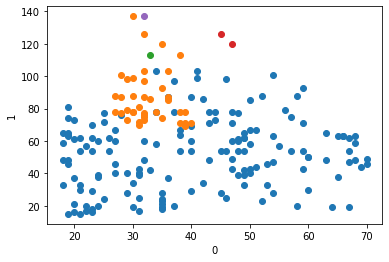

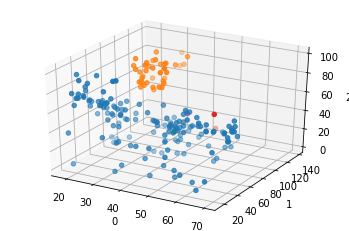

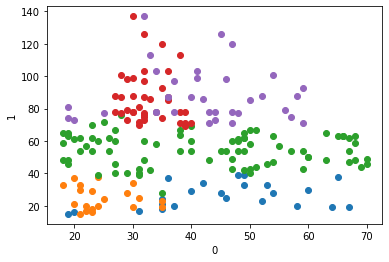

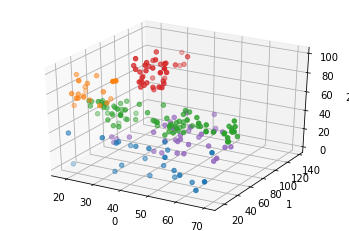

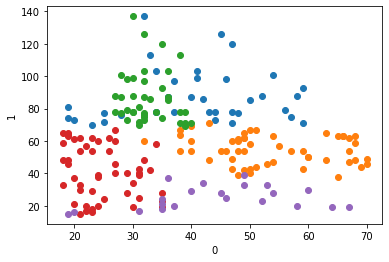

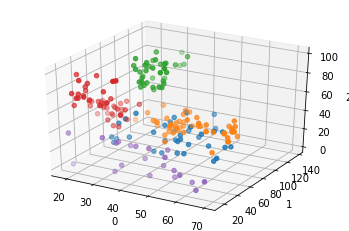

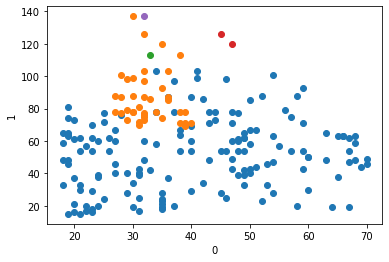

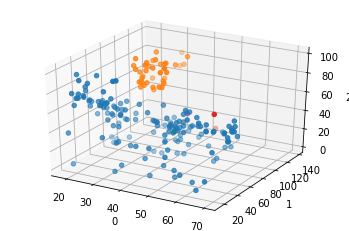

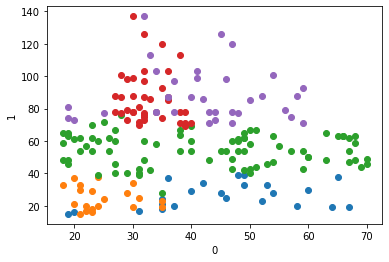

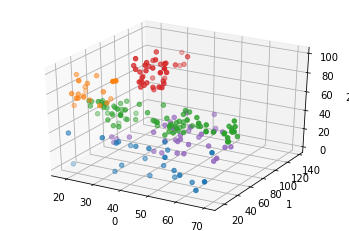

In [269]:
#2.1 runtimes
D=pd.read_csv('Mall_Customers.csv')
del D['CustomerID']
del D['Gender']
D=D.values

start = time.time()
C1=AgglomerativeClusteringW(D,singleLinkW,5)
end= time.time()
print("Tiempo de AgglomerativeClustering singleLink",end-start)
plotClusters(D, C1, 0, 1, None, None)
plotClusters(D, C1, 0, 1, 2, None)

start = time.time()
C1=AgglomerativeClusteringW(D,completeLinkW,5)
end= time.time()
print("Tiempo de AgglomerativeClustering completeLink",end-start)
plotClusters(D, C1, 0, 1, None, None)
plotClusters(D, C1, 0, 1, 2, None)

start = time.time()
C1,mu=kMeans(D,5,0.01)
end= time.time()
print("Tiempo de K-means: ",end-start)
plotClusters(D, C1, 0, 1, None, None)
plotClusters(D, C1, 0, 1, 2, None)

start = time.time()
C1=agglomerativeClusteringNaive(D,deltaSingleNaive,5)
end= time.time()
print("Tiempo de AgglomerativeClusteringNaive singleLink",end-start)
plotClusters(D, C1, 0, 1, None, None)
plotClusters(D, C1, 0, 1, 2, None)

start = time.time()
C1=agglomerativeClusteringNaive(D,deltaCompleteNaive,5)
end= time.time()
print("Tiempo de AgglomerativeClusteringNaive completeLink",end-start)
plotClusters(D, C1, 0, 1, None, None)
plotClusters(D, C1, 0, 1, 2, None)


#podemos observar que el agglomerative Naive es muy lento por que no tiene 
#una tabla pivote sobre la cual trabjar, tiene que calcular distancias
#sobre cada iteracion, externamente estamos realizando otras iteraciones adicionales para hallar las distancias,
#Como resultados vemos que entre el kmeans y el hirerchical cluster no distan demasiado en cuanto a resultado,
#me parece hirercical es importante y util, por que apsear de ser mas demorado, su tiempo
#de ejecucion se suavisa a medida que queremos mas clusters, podria ser una forma de confiar mas 
#en la ejecucion del k-means


distancias entre cluster finales: 
          0         1   2
0       NaN       NaN NaN
1  1.521523       NaN NaN
2  1.438468  1.460329 NaN

cantidad de puntos en cada cluster:  [178 206 116]


'a'

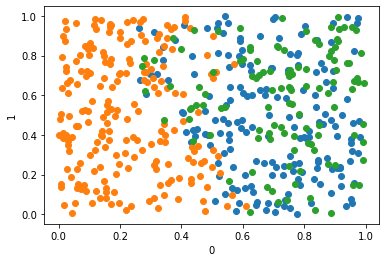

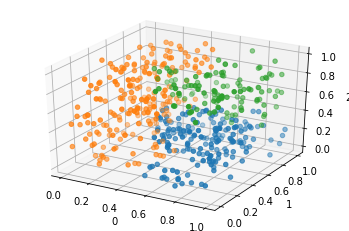

In [285]:
#2.2
D=pd.read_csv('riddle.xls',header=None).values[:,[1,2,3]]

C1=AgglomerativeClusteringW(D,completeLinkW,3)
def getBestProjection(C):
    
    return "a"

getBestProjection(2)
plotClusters(D, C1, 0, 1, None, None)
plotClusters(D, C1, 0, 1, 2, None)
getBestProjection("C")
#Debido a la inviabilidad de realizar un algoritmo que ejecute 1002 C 3,
#decidimos agarrar 3 columnas al azar siempre diferentes de la anterior
#calcular la metrica, ponerle un valor optimo y si esas 3 columas
#superan ese valor, se escogen esas 3 columnas
#No alcanzamos :c


In [261]:
def kMeans(D, k, eps, mu = None):
    rows, columns = D.shape
    
    minValues = np.min(D, axis=0)
    maxValues = np.max(D, axis=0)
    
    if mu is None:
        mu = []
        for i in range(k):
            vals = np.zeros(columns)
            for col in range(columns):
                vals[col] = (random.uniform(minValues[col], maxValues[col]))
            mu.append(vals)
    
    C = np.zeros(rows)
    
    t = 0
    while True:
        t = t+1
        C = np.zeros(rows, dtype=int)
        
        mu_last = mu.copy()
        for i, val in enumerate(D):
            minDistance = np.inf
            for k_i, centroid in enumerate(mu):
                dist = np.linalg.norm(val-centroid)
                if minDistance > dist:
                    minDistance = dist
                    C[i] = k_i+1
        
        for k_i, centroid in enumerate(mu):
            condition = (C == k_i+1)
            indexes =  np.where(condition)[0]
            
            sum_k = np.sum(D[indexes], axis=0)
            mu[k_i] = sum_k/len(indexes)
        
        conv_dist = 0
        for k_i, centroid in enumerate(mu):
            conv_dist += np.linalg.norm(mu[k_i]-mu_last[k_i])
                
        if conv_dist <= eps:
            break;

    return C, mu